In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
titles = {"IT.CEL.SETS.P2":"mobile phone subscriptions per 100 people",
"EG.ELC.ACCS.ZS":"Access to electricity (% of population)",
"IQ.CPA.PROP.XQ":"CPIA property rights and rule-based governance rating (1=low to 6=high)"}
#1990:2017 data
indicators = pd.read_pickle('data/indicators.pkl')
indicators['Year'] = pd.to_numeric(indicators['Year'])
df_allData = pd.read_pickle('data/df_allData.pkl')

In [11]:
indicators.sort_values(['Year']).head()

,ISO,Year,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
6075,ZWE,1990,0.000000,30.357832,None
2099,GHA,1990,0.000000,23.536263,None
2491,ISL,1990,3.924828,100.000000,None
3415,MDV,1990,0.000000,73.088142,None
4731,SRB,1990,NaN,99.271263,None


In [9]:
df_allData.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,...,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918,19.532923,17.107774,22.010869,...,0.000069,121.779978,113.210227,130.192427,76.662263,71.161397,82.116525,0.259259,0.165976,0.370139
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777,19.637998,17.232367,22.088491,...,0.000076,121.924842,113.644684,130.108549,76.753616,71.390596,82.029064,0.261067,0.170775,0.367569
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018,19.741670,17.357383,22.164497,...,0.000083,122.073346,113.918442,130.066324,76.846447,71.554908,81.950016,0.262912,0.174699,0.364517
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950,19.843253,17.486672,22.266846,...,0.000093,122.224822,114.322121,130.152197,76.939638,71.770334,81.920172,0.264802,0.178516,0.363599
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679,19.943436,17.650170,22.328421,...,0.000104,122.376956,114.549692,130.312049,77.032372,71.954991,81.872425,0.266719,0.181058,0.362819


In [12]:
df_tmp = df_allData.groupby(['Year']).get_group(2014)


In [13]:
df_tmp = df_tmp.groupby('Sex').get_group('Men')

In [14]:
df_tmp = df_tmp[['ISO','Age-standardised diabetes prevalence','Mean BMI']]

In [15]:
indicators = indicators.groupby('Year').get_group(2014)

In [16]:
df_tmp = df_tmp.merge(indicators,on='ISO')

In [17]:
df_tmp.head()

,ISO,Age-standardised diabetes prevalence,Mean BMI,Year,IT.CEL.SETS.P2,EG.ELC.ACCS.ZS,IQ.CPA.PROP.XQ
0,AFG,0.115657,22.512386,2014,56.191333,89.500000,1.5
1,ALB,0.076879,26.947170,2014,115.026115,100.000000,None
2,DZA,0.122648,24.687904,2014,110.699326,99.234344,None
3,ASM,0.308217,33.124245,2014,NaN,NaN,None
4,AND,0.080856,27.472020,2014,83.613345,100.000000,None


Text(0.5, 1.0, '2014 - mobile phone subscriptions per 100 people')

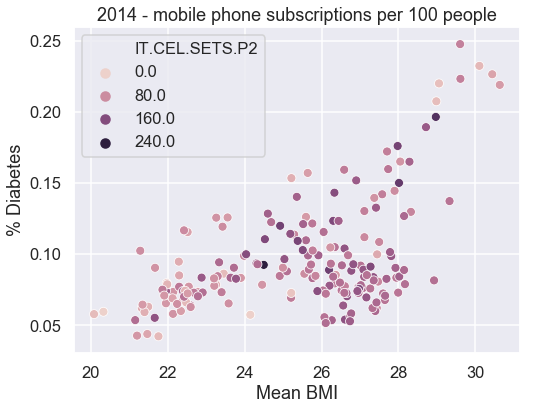

In [71]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes,legend='brief', x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="IT.CEL.SETS.P2",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['IT.CEL.SETS.P2']}")


Text(0.5, 1.0, '2014 - Access to electricity (% of population)')

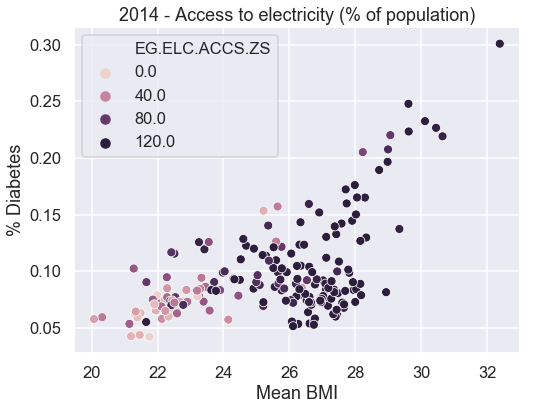

In [72]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes,legend="brief", x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="EG.ELC.ACCS.ZS",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['EG.ELC.ACCS.ZS']}")

In [55]:
df_tmp['IQ.CPA.PROP.XQ']=df_tmp['IQ.CPA.PROP.XQ'].replace(r'\s+',np.nan, regex=True)

In [57]:
df_tmp['IQ.CPA.PROP.XQ'].head()

0    1.5
1    0.0
2    0.0
3    0.0
4    0.0
Name: IQ.CPA.PROP.XQ, dtype: float64

Text(0.5, 1.0, '2014 - CPIA property rights and rule-based governance rating (1=low to 6=high)')

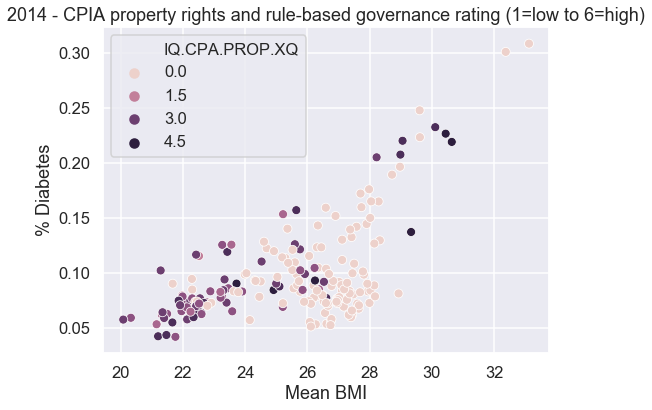

In [73]:
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(ax=axes, legend="brief", x="Mean BMI",y="Age-standardised diabetes prevalence",
                hue="IQ.CPA.PROP.XQ",data=df_tmp)
plt.ylabel("% Diabetes")
plt.title(f"2014 - {titles['IQ.CPA.PROP.XQ']}")